# Experiment-baseline model + with and without Discriminative LR.

In [3]:
from fastai.vision import *
from matplotlib.pyplot import figure
import seaborn as sns


In [4]:
tfms = get_transforms(max_zoom=1.3,max_warp=0.4, max_lighting= 0.4)


In [5]:
np.random.seed(369)
src = (ImageList.from_csv('/home/jupyter/tutorials/data/test925','filename.csv')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [6]:
data = (src.transform(tfms,size=256)
        .databunch().normalize(imagenet_stats))

In [7]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [41]:
learn = cnn_learner(data, models.resnet34, metrics=[acc_02, f_score])

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


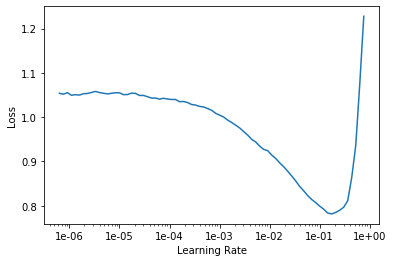

In [9]:
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(10,1e-02)


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.822102,0.548767,0.583951,0.676884,00:18
1,0.604275,0.285499,0.800412,0.790559,00:17
2,0.428199,0.186125,0.899177,0.834843,00:16
3,0.326877,0.216610,0.906584,0.794258,00:17
4,0.271577,0.198503,0.915638,0.823822,00:17
5,0.234528,0.163469,0.918107,0.854542,00:17
6,0.201283,0.141875,0.934568,0.879907,00:17
7,0.172877,0.138204,0.933745,0.891704,00:17
8,0.150423,0.128902,0.939918,0.898051,00:17
9,0.135597,0.127098,0.942387,0.902421,00:17


In [11]:
learn.save('/home/jupyter/exp-1-justfitonecycle')

In [7]:
learn.load('/home/jupyter/exp-1-justfitonecycle')

Learner(data=ImageDataBunch;

Train: LabelList (1621 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
safe_furniture,safe_furniture,safe_furniture,safe_furniture,safe_furniture
Path: /home/jupyter/tutorials/data/test925;

Valid: LabelList (405 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
safe_furniture,unsafe_tv,safe_tv,safe_tv,unsafe_kitchen
Path: /home/jupyter/tutorials/data/test925;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_siz

In [8]:
learn.unfreeze()

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


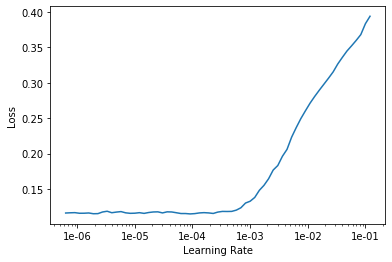

In [10]:
learn.recorder.plot()

#without Discriminative Learning rate 

In [11]:
learn.fit_one_cycle(20,1e-04)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.122931,0.128892,0.938683,0.886892,00:18
1,0.117398,0.122478,0.939506,0.901530,00:20
2,0.111383,0.130214,0.941152,0.899649,00:18
3,0.103964,0.139251,0.940329,0.886803,00:18
4,0.099856,0.155625,0.934568,0.880427,00:19
5,0.094565,0.166189,0.922222,0.859334,00:18
6,0.089740,0.153888,0.934568,0.877147,00:19
7,0.084960,0.140701,0.940329,0.888420,00:18
8,0.079406,0.182448,0.930041,0.858395,00:19
9,0.070401,0.155108,0.932922,0.865815,00:19


In [12]:
learn.save('/home/jupyter/experiments/95.02-91.01-basic-unfreeze')

In [13]:
learn.load('/home/jupyter/exp-1-justfitonecycle')

Learner(data=ImageDataBunch;

Train: LabelList (1621 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
safe_furniture,safe_furniture,safe_furniture,safe_furniture,safe_furniture
Path: /home/jupyter/tutorials/data/test925;

Valid: LabelList (405 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
safe_furniture,unsafe_tv,safe_tv,safe_tv,unsafe_kitchen
Path: /home/jupyter/tutorials/data/test925;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_siz

In [ ]:
now using discriminative LR.

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


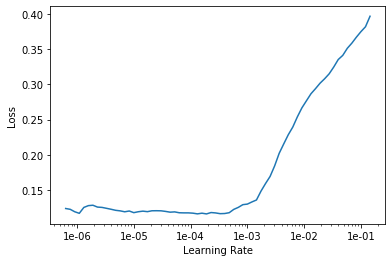

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(20,slice(4e-06,1e-04))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.112937,0.126207,0.940741,0.897659,00:19
1,0.113055,0.127393,0.941564,0.896954,00:18
2,0.114427,0.128390,0.939506,0.889958,00:19
3,0.111833,0.127967,0.940329,0.893966,00:19
4,0.108220,0.125538,0.940329,0.899845,00:20
5,0.104047,0.123046,0.945267,0.899355,00:19
6,0.100112,0.125512,0.943621,0.898101,00:19
7,0.098095,0.120406,0.946091,0.908134,00:18
8,0.093172,0.124563,0.944444,0.905067,00:18
9,0.086637,0.126227,0.941564,0.899767,00:20


In [18]:
learn.save('/home/jupyter/experiments/exp1-with-dlr')

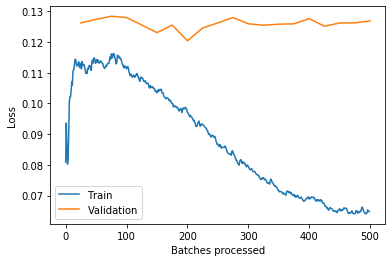

In [19]:
learn.recorder.plot_losses()

In [ ]:
del learn
gc.collect()

In [25]:
learn.load('/home/jupyter/exp-1-justfitonecycle')

Learner(data=ImageDataBunch;

Train: LabelList (1621 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
safe_furniture,safe_furniture,safe_furniture,safe_furniture,safe_furniture
Path: /home/jupyter/tutorials/data/test925;

Valid: LabelList (405 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
safe_furniture,unsafe_tv,safe_tv,safe_tv,unsafe_kitchen
Path: /home/jupyter/tutorials/data/test925;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_siz

In [26]:
learn.unfreeze()

In [27]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


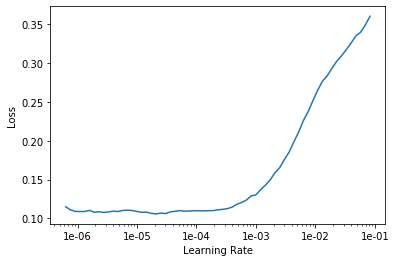

In [28]:
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(20,slice(7e-06,5e-05))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.109054,0.126554,0.944033,0.903949,00:19
1,0.112742,0.125231,0.943621,0.905478,00:19
2,0.111628,0.124856,0.943210,0.905733,00:18
3,0.110358,0.124381,0.942387,0.897777,00:20
4,0.108146,0.123332,0.941564,0.897757,00:19
5,0.104402,0.125176,0.941975,0.897483,00:20
6,0.100972,0.126969,0.941975,0.892329,00:18
7,0.094991,0.123408,0.943210,0.901480,00:19
8,0.092443,0.126973,0.943621,0.902186,00:18
9,0.087341,0.124184,0.944444,0.901844,00:18


# observation:

 our model converged to better minima by just using 1 learning rate rather than discriminative learning rate.
but using discriminative learning rate made converging faster as the model with DLR model reached its best at 3rd epoch while later reached its best at 12th epoch.

Text(0.5, 1.0, 'with DLR')

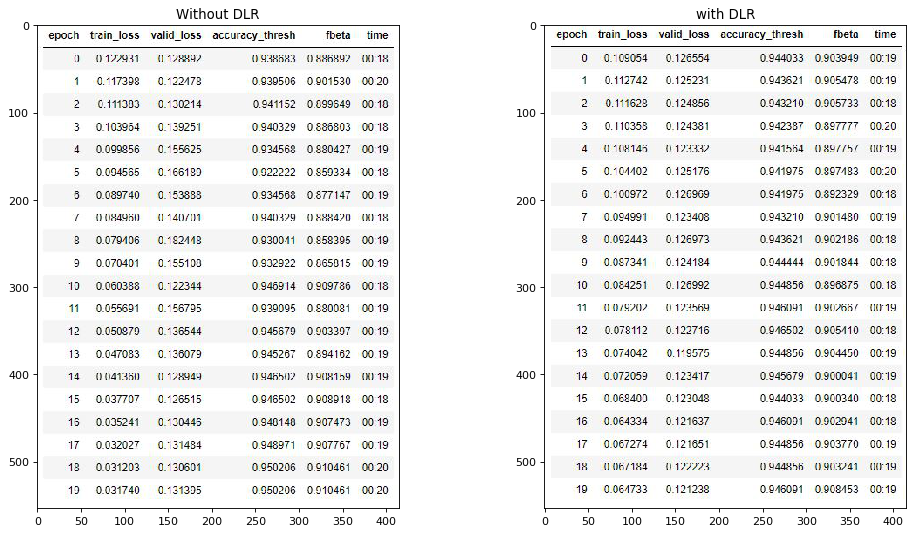

In [34]:
plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
img = plt.imread('/home/jupyter/experiments/exp1-without-dlr.JPG') ; plt.imshow(img)
plt.title('Without DLR')
plt.subplot(1,2,2)
img_1 = plt.imread('/home/jupyter/experiments/exp1-with-dlr.JPG''') ; plt.imshow(img_1)
plt.title('with DLR')

We decided to use DLR, in our finale model.

In [35]:
del learn
gc.collect()

6892

In [ ]:
acc_02 = partial(accuracy_thresh, thresh=0.3)
f_score = partial(fbeta, thresh=0.2)

In [42]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


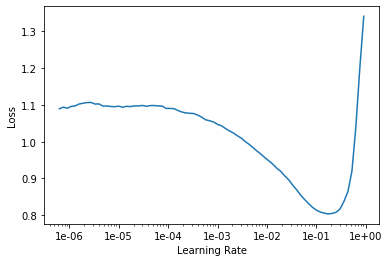

In [43]:
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(10,9e-03)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.852041,0.581762,0.657613,0.675197,00:18
1,0.638913,0.324138,0.835802,0.775841,00:17
2,0.450537,0.206762,0.916049,0.832835,00:18
3,0.346134,0.165701,0.930041,0.851845,00:18
4,0.278187,0.194453,0.923457,0.835669,00:17
5,0.233772,0.182242,0.930864,0.864071,00:17
6,0.201654,0.162842,0.934979,0.873102,00:17
7,0.177684,0.158640,0.939918,0.881278,00:17
8,0.156555,0.155961,0.938272,0.876292,00:18
9,0.139891,0.152460,0.940329,0.878369,00:17


In [45]:
learn.unfreeze()

In [46]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


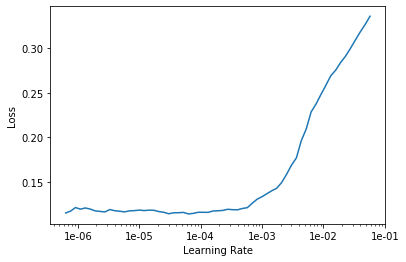

In [47]:
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(20,slice(1e-05,7e-05))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.112326,0.151414,0.939918,0.879534,00:19
1,0.112666,0.150057,0.941152,0.883014,00:19
2,0.113658,0.148123,0.942387,0.879290,00:18
3,0.111483,0.148003,0.944033,0.888529,00:18
4,0.110165,0.149026,0.941564,0.889851,00:19
5,0.103258,0.147222,0.941152,0.883423,00:20
6,0.100781,0.150161,0.938683,0.891037,00:20
7,0.096828,0.148483,0.945267,0.893330,00:19
8,0.091093,0.147894,0.946091,0.901119,00:19
9,0.084255,0.147603,0.944033,0.895240,00:19


after trying different accu_thresold,f-score thresold values default settings works better.

best acc-thres and f-score were observed to be 95 and 91 achived just by training it with 1 lr.

In [1]:
del learn
gc.collect()

NameError: name 'learn' is not defined

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=[acc_02, f_score]).mixup(stack_y=False)

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


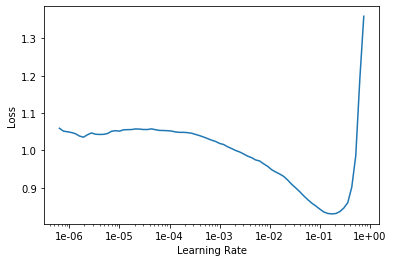

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(12,5e-02)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.759105,0.382251,0.712346,0.708521,00:18
1,0.555170,0.618228,0.767901,0.522846,00:18
2,0.504757,0.535377,0.790947,0.451235,00:18
3,0.463526,0.426581,0.798765,0.550382,00:18
4,0.422999,0.249991,0.853498,0.770341,00:17
5,0.384221,0.307629,0.814815,0.685513,00:18
6,0.357088,0.217418,0.881893,0.816893,00:17
7,0.333547,0.241030,0.878189,0.767424,00:18
8,0.323367,0.195009,0.887654,0.835128,00:17
9,0.308190,0.186006,0.902469,0.837390,00:17


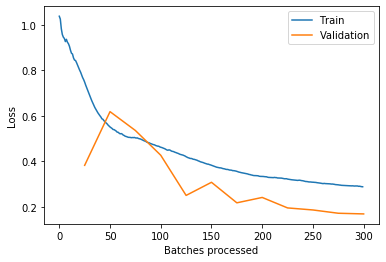

In [12]:
learn.recorder.plot_losses()

In [13]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


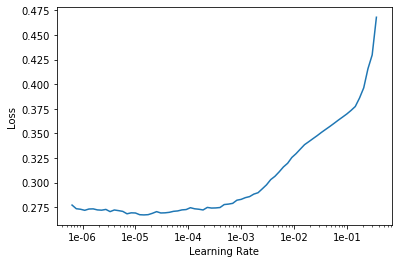

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(20,slice(1e-06,1e-06))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.270629,0.169022,0.906173,0.850177,00:18
1,0.269336,0.168429,0.906996,0.852347,00:19
2,0.268656,0.166675,0.906173,0.851916,00:18
3,0.269707,0.166728,0.905761,0.852098,00:20
4,0.268673,0.165829,0.907819,0.853450,00:19
5,0.267099,0.166141,0.908230,0.855208,00:18
6,0.267036,0.165601,0.907819,0.851093,00:19
7,0.269214,0.165275,0.910288,0.854816,00:19
8,0.268842,0.166801,0.907407,0.853445,00:18
9,0.268112,0.165940,0.909465,0.854385,00:19


# Mixup did not help our model